# Lowercase

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


file_path = 'https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true'
df_israel = pd.read_excel(file_path)
file_path = 'https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true'
df_pal = pd.read_excel(file_path)

Israel Basic word cloud

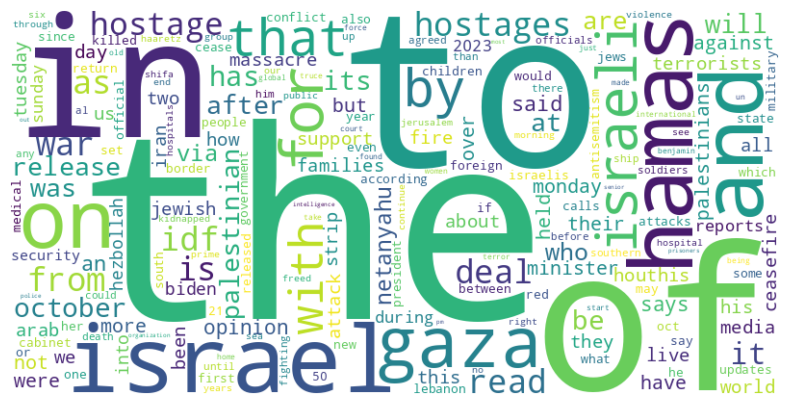

In [ ]:
# Extract the 'Content' column
content = df_israel['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())
# here is the lower casing
all_text = all_text.lower()
# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Palestine Basic Word Cloud

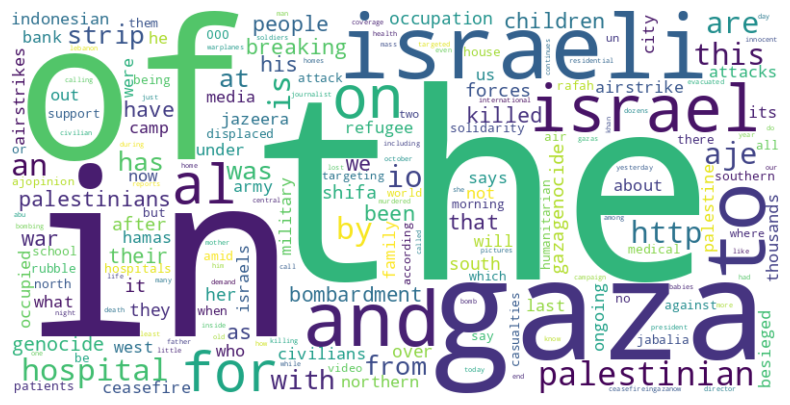

In [ ]:
# Extract the 'Content' column
content = df_pal['Content']

# Combine all the text into a single string
all_text = ' '.join(content.dropna())
all_text = all_text.lower()
# Use CountVectorizer to preprocess the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([all_text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding frequencies
word_frequencies = dict(zip(feature_names, X.toarray()[0]))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Information Gain

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('punkt')


def load_data(file1, file2):
    df1 = pd.read_excel(file1)
    df2 = pd.read_excel(file2)
    df1['source'] = 0  # Label for first dataset
    df2['source'] = 1  # Label for second dataset
    combined_df = pd.concat([df1, df2], ignore_index=True)
    return combined_df['Content'], combined_df['source']

#Calculates the information gain of every word as to how helpful the word is in
#grouping the tweet categorically, the higher the information gain the more likely
#it is that this single word is a good predictor of which side the tweet is on
def calculate_information_gain(X, y, stop_words):
    vectorizer = CountVectorizer(stop_words=stop_words)
    X_vec = vectorizer.fit_transform(X)
    information_gain = mutual_info_classif(X_vec, y)
    return information_gain, vectorizer.get_feature_names_out()

#Calculate information gain without stop words and stem the words
def stem_text(text):
    tokenized_text = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in tokenized_text]
    return ' '.join(stemmed_text)


def main():
    file1 = 'https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true'
    file2 = 'https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true'

    # Combine the tweets but lable them to get information gain
    tweets, labels = load_data(file1, file2)

    information_gain, feature_names = calculate_information_gain(tweets, labels, None)

    # Combine feature names and their information gains
    features_info_gain = list(zip(feature_names, information_gain))

    # Sort features by information gain
    features_info_gain.sort(key=lambda x: x[1], reverse=True)

    # Print top 20 words with highest information gain
    print("Top 20 words with highest information gain:")
    for word, gain in features_info_gain[:20]:
        print(f"{word}: {gain}")

    # Lemmatize tweets
    tweets_stemmed = [stem_text(tweet) for tweet in tweets]

    information_gain, feature_names = calculate_information_gain(tweets_stemmed, labels, 'english')

    # Combine feature names and their information gains
    features_info_gain = list(zip(feature_names, information_gain))

    # Sort features by information gain
    features_info_gain.sort(key=lambda x: x[1], reverse=True)
    print()
    print()
    print()
    # Print top 20 words with highest information gain
    print("Stemmed top 20 words with highest information gain:")
    for word, gain in features_info_gain[:20]:
        print(f"{word}: {gain}")


if __name__ == "__main__":
    main()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 words with highest information gain:
hamas: 0.10019991014182432
gaza: 0.0960228614337653
read: 0.06726089038870917
israeli: 0.06636741551249899
aje: 0.06474758081845733
io: 0.06474758081845733
hostages: 0.04832365691769577
to: 0.045339356405026836
hostage: 0.04270663777963814
http: 0.04257316377541619
deal: 0.0403846628946604
al: 0.03814939327118339
idf: 0.03813268198342422
hospital: 0.03180996876177464
via: 0.031667256740533556
in: 0.03123949545528376
bombardment: 0.030888411200684612
gazagenocide: 0.02778566022113646
opinion: 0.02624180375022729
the: 0.026051518508425554



Stemmed top 20 words with highest information gain:
gaza: 0.10134372543001548
hama: 0.0917656250750103
hostag: 0.08611092599199072
aje: 0.06474758081845733
io: 0.06474758081845733
read: 0.06214362045562612
isra: 0.05483959400743953
deal: 0.041949690222857744
http: 0.0401900696695703
al: 0.03814939327118339
idf: 0.03813268198342422
bombard: 0.03244737401624134
break: 0.028548782240807855
hospit: 0.0282254016

# PMI

In [ ]:
from nltk import collocations
def get_PMI(content):
  all_text = ' '.join(content.dropna())

  # Tokenize the text into words
  # Tokenize the documents
  tokenized_documents = [word_tokenize(doc) for doc in content.dropna()]

  # Use CountVectorizer to create a document-term matrix
  vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
  dtm = vectorizer.fit_transform(tokenized_documents)

  # Get feature names (words)
  # Use built in PMI methods
  feature_names = vectorizer.get_feature_names_out()
  # Use NLTK's BigramCollocationFinder to find bigrams
  bigram_measures = collocations.BigramAssocMeasures()
  finder = collocations.BigramCollocationFinder.from_documents(tokenized_documents)

  # Calculate PMI for each bigram
  pmi_scores = {bigram: pmi for bigram, pmi in finder.score_ngrams(bigram_measures.pmi)}

  # Count document frequency of each bigram
  doc_freq = dtm.sum(axis=0)

  # Filter bigrams based on the specified document frequency threshold
  min_doc_freq = 30

  filtered_pmi_scores = {bigram: pmi for bigram, pmi in pmi_scores.items() if doc_freq[0, vectorizer.vocabulary_[bigram[0]]] >= min_doc_freq and doc_freq[0, vectorizer.vocabulary_[bigram[1]]] >= min_doc_freq}

  # Sort the filtered bigrams by PMI in descending order
  sorted_filtered_pmi_scores = sorted(filtered_pmi_scores.items(), key=lambda x: x[1], reverse=True)

  # Display the top N bigrams with the highest PMI and at least 30 documents
  top_n = 30
  for bigram, pmi in sorted_filtered_pmi_scores[:top_n]:
      print(f'Bigram: {bigram}, PMI: {pmi}, Document Frequency: {doc_freq[0, vectorizer.vocabulary_[bigram[0]]]}')
print("Israel")
get_PMI(df_israel['Content'])
print("\n\n\nPalestine")
get_PMI(df_pal['Content'])


Israel
Bigram: ('October', '7'), PMI: 7.879266347900167, Document Frequency: 52
Bigram: ('&', '…'), PMI: 7.662900001567655, Document Frequency: 73
Bigram: ('hostage', 'deal'), PMI: 7.196357366909508, Document Frequency: 53
Bigram: ('’', 's'), PMI: 7.045369638390071, Document Frequency: 112
Bigram: ('on', 'Monday'), PMI: 6.275295732411925, Document Frequency: 191
Bigram: ('will', 'be'), PMI: 6.112483834248609, Document Frequency: 49
Bigram: ('/', '@'), PMI: 6.06612819855687, Document Frequency: 32
Bigram: ('Netanyahu', 'said'), PMI: 5.901439845480702, Document Frequency: 33
Bigram: ('hostage', 'release'), PMI: 5.839401887022225, Document Frequency: 53
Bigram: ('…', '.'), PMI: 5.835916272761118, Document Frequency: 72
Bigram: ('will', 'not'), PMI: 5.778583097695169, Document Frequency: 49
Bigram: ('said', 'after'), PMI: 5.401513448615345, Document Frequency: 30
Bigram: ('not', 'be'), PMI: 5.223367940368064, Document Frequency: 33
Bigram: ('|', '#'), PMI: 5.13167065336008, Document Freque

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Bigram: ('have', 'been'), PMI: 7.169782124983577, Document Frequency: 51
Bigram: ('occupation', 'forces'), PMI: 6.903608011619216, Document Frequency: 33
Bigram: ('has', 'been'), PMI: 6.630589517212801, Document Frequency: 58
Bigram: ('been', 'killed'), PMI: 6.28889816750401, Document Frequency: 44
Bigram: ('http', ':'), PMI: 6.105651787563861, Document Frequency: 82
Bigram: ('This', 'was'), PMI: 5.5372857973734035, Document Frequency: 33
Bigram: ('s', ':'), PMI: 5.427579882451223, Document Frequency: 40
Bigram: ('war', 'on'), PMI: 5.411754915289542, Document Frequency: 44
Bigram: ('her', 'children'), PMI: 5.35181237483326, Document Frequency: 32
Bigram: ('#', 'GazaGenocide'), PMI: 5.347624577869826, Document Frequency: 345
Bigram: ('Gaza', 'Strip'), PMI: 5.316352138032645, Document Frequency: 339
Bigram: ('Israel', "'s"), PMI: 5.287727623796071, Document Frequency: 137
Bigram: ('after', 'it'), PMI: 5.105651787563863, Document Frequency: 36
Bigram: (':', 'http'), PMI: 5.105651787563861

# Bayes Factor

((num of pro israel tweets it appears in)/(total num of pro israel tweets))/((num of pro pal tweets it appears in)/(total num of pro pal tweets))

In [ ]:
# do the math in the above formula
def get_bayes_factor(word, i_tweets, p_tweets):
  pro_israel_tweets_appears = 1
  pro_pal_tweets_appears = 1
  for tweet in i_tweets:
    if(word in tweet):
      pro_israel_tweets_appears+=1
  for tweet in p_tweets:
    if(word in tweet):
      pro_pal_tweets_appears+=1
  return((pro_israel_tweets_appears/len(i_tweets))/(pro_pal_tweets_appears/len(p_tweets)))




content = df_israel['Content']

all_text = ' '.join(content.dropna())
# Tokenize the text into words
# Tokenize the documents
tokenized_pi_documents = [word_tokenize(doc) for doc in content.dropna()]

#initialize a word set
word_set = {'a','the'}
for doc in tokenized_pi_documents:
  word_set.update(doc)

content = df_pal['Content']

all_text = ' '.join(content.dropna())
# Tokenize the text into words
# Tokenize the documents
tokenized_pp_documents = [word_tokenize(doc) for doc in content.dropna()]
for doc in tokenized_pp_documents:
  word_set.update(doc)

word_to_bayes = {}
for word in word_set:
  word_to_bayes[word]=get_bayes_factor(word, tokenized_pi_documents, tokenized_pp_documents)


sorted_bayes = sorted(word_to_bayes.items(), key=lambda x: x[1], reverse=True)

# Print the top 20 words based on values
print("Top 20 pro Israel Bayes Factor:")
for word, value in sorted_bayes[:20]:
    print(f"{word}: {value}")

sorted_bayes = sorted(word_to_bayes.items(), key=lambda x: x[1], reverse=False)

# Print the top 20 words based on lowest value but find the resprical so these are
# High values from the Palestine perspective
print('\n\n')
print("Top 20 pro Palestine Bayes Factor:")
for word, value in sorted_bayes[:20]:
    print(f"{word}: {1/value}")


Top 20 pro Israel Bayes Factor:
|: 115.0
’: 90.0
…: 73.0
read: 73.0
hostages: 60.0
hostage: 54.0
via: 43.00000000000001
&: 37.0
/: 33.0
‘: 31.0
terrorists: 22.0
Opinion: 20.0
deal: 19.666666666666668
Israel-Hamas: 17.0
opinion: 17.0
t: 16.0
Sunday: 16.0
IDF: 15.249999999999998
LIVE: 15.0
Iran: 14.0



Top 20 pro Palestine Bayes Factor:
bombardment: 41.99999999999999
GazaGenocide: 38.0
occupied: 23.0
besieged: 22.000000000000004
airstrikes: 20.999999999999996
occupation: 16.5
rubble: 15.0
Rafah: 15.0
Jabalia: 15.0
house: 15.0
AJOpinion: 14.0
al-Shifa: 13.5
refugee: 13.5
residential: 13.000000000000002
Khan: 13.000000000000002
coverage: 13.000000000000002
Indonesian: 12.5
genocide: 12.333333333333334
pictures: 12.0
Abu: 12.0


# Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('punkt')

num_features = 1000

def load_data(file1, file2):
    df1 = pd.read_excel(file1)
    df2 = pd.read_excel(file2)
    df1['source'] = 0  # Label for first dataset
    df2['source'] = 1  # Label for second dataset
    combined_df = pd.concat([df1, df2], ignore_index=True)
    return combined_df['Content'], combined_df['source']

#Calculates the information gain of every word as to how helpful the word is in
#grouping the tweet categorically, the higher the information gain the more likely
#it is that this single word is a good predictor of which side the tweet is on
def calculate_information_gain(X, y, stop_words):
    vectorizer = CountVectorizer(stop_words=stop_words)
    X_vec = vectorizer.fit_transform(X)
    information_gain = mutual_info_classif(X_vec, y)
    return information_gain, vectorizer.get_feature_names_out()

#Calculate information gain without stop words and lemitization
def stem_text(text):
    tokenized_text = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in tokenized_text]
    return ' '.join(stemmed_text)



file1 = 'https://github.com/rosenfa/ai/blob/master/news-israel.xlsx?raw=true'
file2 = 'https://github.com/rosenfa/ai/blob/master/news-pal.xlsx?raw=true'

tweets, labels = load_data(file1, file2)

information_gain, feature_names = calculate_information_gain(tweets, labels, None)

# Combine feature names and their information gains
features_info_gain = list(zip(feature_names, information_gain))

# Sort features by information gain
features_info_gain.sort(key=lambda x: x[1], reverse=True)

# Print top 20 words with highest information gain
print("Top 20 words with highest information gain:")
for word, gain in features_info_gain[:20]:
    print(f"{word}: {gain}")

# Lemmatize tweets
tweets_stemmed = [stem_text(tweet) for tweet in tweets]

information_gain, feature_names = calculate_information_gain(tweets_stemmed, labels, 'english')

# Combine feature names and their information gains
features_info_gain = list(zip(feature_names, information_gain))

# Sort features by information gain
features_info_gain.sort(key=lambda x: x[1], reverse=True)
print()
print()
print()
# Print top 20 words with highest information gain

bag_of_words = [t[0] for t in features_info_gain]
bag_of_words = bag_of_words[:num_features]
places ={}
for index, word in enumerate(bag_of_words):
  places[word] = index
print(places)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 words with highest information gain:
hamas: 0.10019991014182432
gaza: 0.0960228614337653
read: 0.06726089038870917
israeli: 0.06636741551249899
aje: 0.06474758081845733
io: 0.06474758081845733
hostages: 0.04832365691769577
to: 0.045339356405026836
hostage: 0.04270663777963814
http: 0.04257316377541619
deal: 0.0403846628946604
al: 0.03814939327118339
idf: 0.03813268198342422
hospital: 0.03180996876177464
via: 0.031667256740533556
in: 0.03123949545528376
bombardment: 0.030888411200684612
gazagenocide: 0.02778566022113646
opinion: 0.02624180375022729
the: 0.026051518508425554



{'gaza': 0, 'hama': 1, 'hostag': 2, 'aje': 3, 'io': 4, 'read': 5, 'isra': 6, 'deal': 7, 'http': 8, 'al': 9, 'idf': 10, 'bombard': 11, 'break': 12, 'hospit': 13, 'gazagenocid': 14, 'hamas': 15, 'opinion': 16, 'airstrik': 17, 'palestinian': 18, 'releas': 19, 'occup': 20, 'thi': 21, 'genocid': 22, 'besieg': 23, 'israel': 24, 'jazeera': 25, 'bomb': 26, 'octob': 27, 'monday': 28, 'occupi': 29, 'refuge': 30, 'ter

In [ ]:
def tokenize(all_tweets):
  doc = []
  for tweet in all_tweets:
    tweet_list = word_tokenize(tweet)
    doc.append(tweet_list)
  return doc



tokened_tweets = tokenize(tweets_stemmed)


X = []
for tweet in tokened_tweets:
  vector = np.zeros(num_features)
  for token in tweet:
    if token in places:
      vector[places[token]] = 1
  X.append(vector)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


With 200 of the top information gain stemmed words the model works at 93%

With 1000 of the top information gain stemmed words accuracy works at close to 95% accuracy(likely the best feature selection)

With 1000 of the top information gain non stemmed words including stop words accuracy works at close to 90.5% accuracy

With 2000 of the top information gain stemmed words accuracy works at close to 94% accuracy

I have chosen to keep in what might seem like 'dead fish', I do not have the expertice to properly assess if a token is really not important(like http) to the conflict. I have already removed stop words so that certainly helps eliminate some 'dead fish' and I still ended up with a good feature selection

# Models

I already did logistic regression and that worked well. I will make a few other models using 1000 stemmed words

In [ ]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

scores = cross_val_score(model, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", np.mean(scores))
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.90526316 0.94736842 0.91578947 0.95789474 0.92631579 0.94736842
 0.96842105 0.94736842 0.93684211 0.90526316]
Mean cross-validation score: 0.9357894736842105
Accuracy: 0.9473684210526315


Now try with Random Forest to see if scores imrove

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

scores = cross_val_score(model, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", np.mean(scores))
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.85263158 0.94736842 0.86315789 0.95789474 0.90526316 0.92631579
 0.95789474 0.88421053 0.91578947 0.85263158]
Mean cross-validation score: 0.9063157894736842
Accuracy: 0.9157894736842105


Try with knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

scores = cross_val_score(model, X, labels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", np.mean(scores))
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.76842105 0.8        0.83157895 0.83157895 0.77894737 0.82105263
 0.91578947 0.72631579 0.76842105 0.75789474]
Mean cross-validation score: 0.8
Accuracy: 0.8421052631578947


The best was logistic regression model. This is partialy due to trial and error but also might be expected since Logistic regression assigns a learned weight to each word and since some words are very good indicators of classification, this model works well
